In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# PRE PROCESAMIENTO

dataset = pd.read_csv('C:/Users/franc/pasantia_IA/datasets/dataset.csv')

# limpiar las filas
valid_status = ['COMPLETED', 'FINISHED', 'RELEASED']

# convertir las columnas no numericas a numericas (aplicar hot encoding)
dataset = pd.get_dummies(dataset, columns=['StatusCode'])

# limpiar las columnas
dataset.drop(columns=[
    'Summary',
    'RaisedByID',
    'AssignedToID',
    'AuthorisedByID',
    'ProjectBreakdownCode',
    'Category', 
    'SubCategory',
    'DeveloperHoursActual',
    'TaskPerformance',
    'DeveloperPerformance',
    'ProjectCode',
], inplace=True)

dataset


,TaskNumber,Priority,HoursEstimate,HoursActual,DeveloperID,StatusCode_AUTHORISE,StatusCode_CANCELLED,StatusCode_CHRONICLE,StatusCode_COMPLETED,StatusCode_ESTIMATED,StatusCode_FINISHED,StatusCode_RELEASED,StatusCode_TEMPLATE
0,1735,1,14.0,1.75,58,False,False,False,False,False,True,False,False
1,1742,1,7.0,7.00,42,False,False,False,False,False,True,False,False
2,1971,2,0.7,0.70,58,False,False,False,False,False,True,False,False
3,2134,5,0.7,0.70,42,False,False,False,False,False,True,False,False
4,2251,10,3.5,3.50,13,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12294,14373,1,1.0,0.83,13,False,False,False,True,False,False,False,False
12295,14374,1,50.0,19.25,58,False,False,True,False,False,False,False,False
12296,14375,1,3.5,7.60,58,False,False,False,False,False,True,False,False
12297,14376,2,1.5,0.61,58,False,False,True,False,False,False,False,False


### Data Analysis

Evaluate the correlation between all the inputs and the real time spent doing the tasks

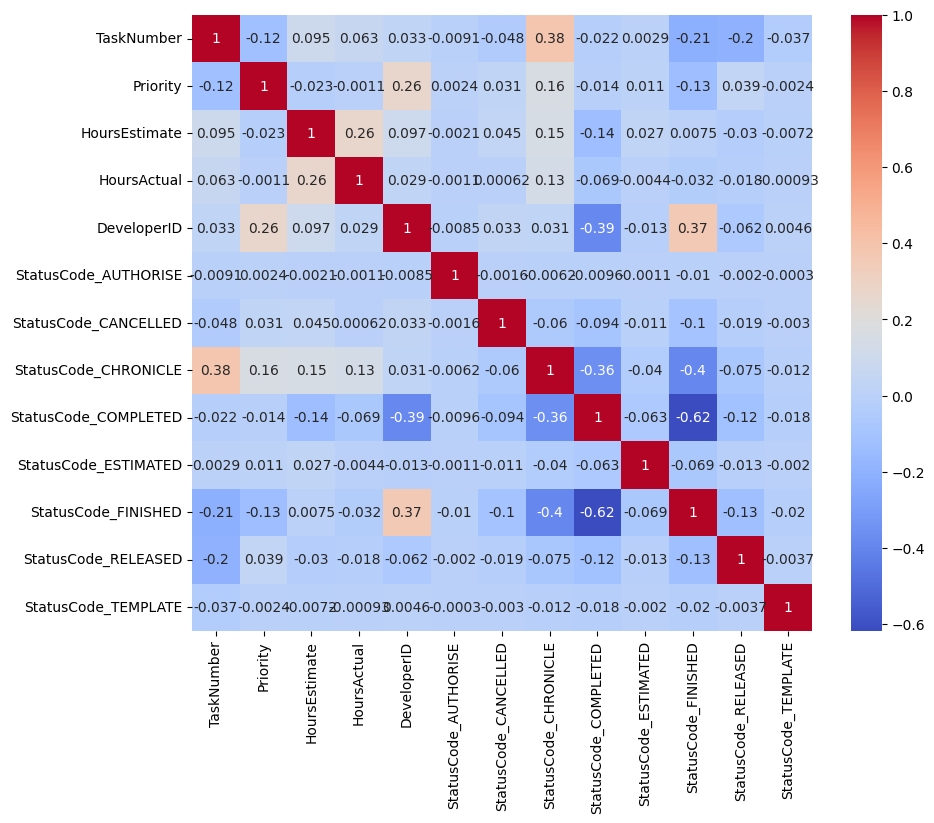

In [3]:
correlation_matrix = dataset.corr()
correlation_matrix['HoursActual'].sort_values(ascending=False)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

Scatter plot to have an idea of the deviation

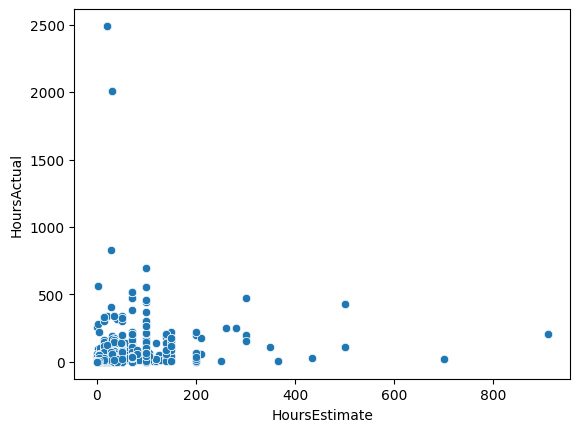

In [5]:
sns.scatterplot(x='HoursEstimate', y='HoursActual', data=dataset)
plt.show()